<a href="https://colab.research.google.com/github/sakaleshhubli/AI/blob/main/07_Linear_Regression_using_math.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
url = 'https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv'
data = pd.read_csv(url)
X = data['Experience Years'].values  # Feature (1D array)
y = data['Salary'].values            # Target (1D array)

In [8]:
X_mean = np.mean(X)
X_std = np.std(X)
X_scaled = (X - X_mean) / X_std  # Scaled feature (mean=0, std=1)

### Feature Scaling (Z-Score Normalization)

**Feature Scaling** is a technique used in data preprocessing to **standardize** the range of independent features in a dataset.

#### Why it's Important:
Many machine learning algorithms (like k-NN, SVM, Logistic Regression, etc.) perform better when all features have similar scales. Without scaling, features with larger ranges can dominate others.

#### What is Z-Score Normalization?
Z-Score Normalization (also called **Standardization**) transforms your feature values so they have:
- **Mean = 0**
- **Standard Deviation = 1**

#### Formula:
$$
z = \frac{x - \mu}{\sigma}
$$
Where:
- \( x \) = original value
- \( \mu \) = mean of the feature
- \( \sigma \) = standard deviation of the feature

#### Example:

| Original Feature (e.g. Age) | Standardized |
|-----------------------------|--------------|
| 20                          | -1.41        |
| 30                          | -0.71        |
| 40                          | 0            |
| 50                          | 0.71         |
| 60                          | 1.41         |

#### When to Use:
- Data contains features with **different units/scales**
- Algorithms are **distance-based** (k-NN, k-means, SVM, etc.)


In [9]:
learning_rate = 0.01  # Step size for gradient descent
epochs = 1000         # Number of iterations
N = len(X_scaled)     # Number of data points

### 1. **Cost Function (MSE - Mean Squared Error)**

The **Cost Function** (also known as **Loss Function**) measures how well a model's predictions match the actual data. In the context of linear regression, we often use **Mean Squared Error (MSE)** as the cost function.

#### **MSE Formula**:
$$
J = \frac{1}{2N} \sum_{i=1}^{N} \left( \hat{y}_i - y_i \right)^2
$$

Where:
- \( J \) = cost function (MSE)
- \( \hat{y}_i \) = predicted value for the \(i\)-th data point
- \( y_i \) = actual value for the \(i\)-th data point
- \( N \) = total number of data points

#### **How it works**:
- MSE calculates the **average squared difference** between the predicted values and the actual values.
- The **squared term** ensures that both positive and negative errors contribute equally to the cost.
- The smaller the MSE, the better the model's predictions are.

#### **Why \( \frac{1}{2} \) in the formula?**
- The \( \frac{1}{2} \) is just a **constant factor** to simplify the gradient calculations (as it cancels out during differentiation). It doesn't change the nature of the MSE.

---

### 2. **Gradient Descent**

**Gradient Descent** is an optimization algorithm used to minimize the **cost function**. It helps us find the optimal values for the parameters (weights) of the model, such as \(m\) (slope) and \(b\) (intercept) in linear regression.

#### **How Gradient Descent Works**:

1. **Start with random values** for the parameters (e.g., \( m \) and \( b \)).
2. **Calculate the cost**: Use the current values of the parameters to calculate the cost function (MSE) with the predictions of the model.
3. **Calculate gradients**: Find the **partial derivatives** (gradients) of the cost function with respect to each parameter.
    - Gradient of \( m \): \( \frac{\partial J}{\partial m} \)
    - Gradient of \( b \): \( \frac{\partial J}{\partial b} \)
4. **Update parameters**: Adjust the parameters by subtracting a fraction of the gradient from their current values. This fraction is called the **learning rate** \( \alpha \).
   - For \( m \): \( m = m - \alpha \cdot \frac{\partial J}{\partial m} \)
   - For \( b \): \( b = b - \alpha \cdot \frac{\partial J}{\partial b} \)
5. **Repeat** steps 2-4 until the cost function stops decreasing or reaches a minimum value (convergence).

#### **Gradients**:

Gradients indicate the **direction of steepest ascent** in the cost function. In gradient descent, we update the parameters in the **opposite direction** of the gradient (steepest descent).

- **Gradient for \( m \)**: Measures how much the cost function changes when \( m \) changes.
  
  $$
  \frac{\partial J}{\partial m} = \frac{1}{N} \sum_{i=1}^{N} \left( \hat{y}_i - y_i \right) \cdot X_{\text{scaled},i}
  $$

- **Gradient for \( b \)**: Measures how much the cost function changes when \( b \) changes.
  
  $$
  \frac{\partial J}{\partial b} = \frac{1}{N} \sum_{i=1}^{N} \left( \hat{y}_i - y_i \right)
  $$

#### **Learning Rate**:
The learning rate (\( \alpha \)) controls the **size of the steps** taken towards the minimum. A small learning rate makes slow progress but may be more stable, while a large learning rate can lead to overshooting the minimum.

---

### **Summary**:

- **MSE (Cost Function)** helps us measure the difference between predicted and actual values and tells us how well our model is performing.
- **Gradient Descent** is the method used to find the optimal parameters for the model by iteratively minimizing the cost function.


In [11]:
m = 0.0  # Slope (weight)
b = 0.0  # Intercept (bias)

In [12]:
cost_history = []

for epoch in range(epochs):
    # Predictions
    y_pred = m * X_scaled + b

    # Errors
    errors = y_pred - y

    # Compute gradients
    dm = (1/N) * np.dot(errors, X_scaled)
    db = (1/N) * np.sum(errors)

    # Update parameters
    m -= learning_rate * dm
    b -= learning_rate * db

    # Compute cost (MSE)
    cost = (1 / (2 * N)) * np.sum(errors ** 2)
    cost_history.append(cost)

    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Cost = {cost:.2f}")


"""
This code implements linear regression using batch gradient descent optimization.
It iteratively updates the model parameters (slope m and intercept b) to minimize
the Mean Squared Error (MSE) between predictions and actual values.

Parameters:
- epochs: Number of training iterations
- learning_rate: Step size for parameter updates
- X_scaled: Feature values (normalized/scaled)
- y: Target values
- N: Number of training examples
- m, b: Model parameters (slope and intercept)

The algorithm:
1. Makes predictions using current parameters
2. Calculates prediction errors
3. Computes gradients based on errors
4. Updates parameters using gradients and learning rate
5. Tracks cost (MSE) over time for monitoring convergence

Cost history is stored for later analysis or visualization of the training process.
"""

Epoch 0: Cost = 3121515667.24
Epoch 100: Cost = 430759794.59
Epoch 200: Cost = 70253197.66
Epoch 300: Cost = 21952641.01
Epoch 400: Cost = 15481348.14
Epoch 500: Cost = 14614326.42
Epoch 600: Cost = 14498163.14
Epoch 700: Cost = 14482599.62
Epoch 800: Cost = 14480514.42
Epoch 900: Cost = 14480235.05


'\nThis code implements linear regression using batch gradient descent optimization.\nIt iteratively updates the model parameters (slope m and intercept b) to minimize\nthe Mean Squared Error (MSE) between predictions and actual values.\n\nParameters:\n- epochs: Number of training iterations\n- learning_rate: Step size for parameter updates\n- X_scaled: Feature values (normalized/scaled)\n- y: Target values\n- N: Number of training examples\n- m, b: Model parameters (slope and intercept)\n\nThe algorithm:\n1. Makes predictions using current parameters\n2. Calculates prediction errors\n3. Computes gradients based on errors\n4. Updates parameters using gradients and learning rate\n5. Tracks cost (MSE) over time for monitoring convergence\n\nCost history is stored for later analysis or visualization of the training process.\n'

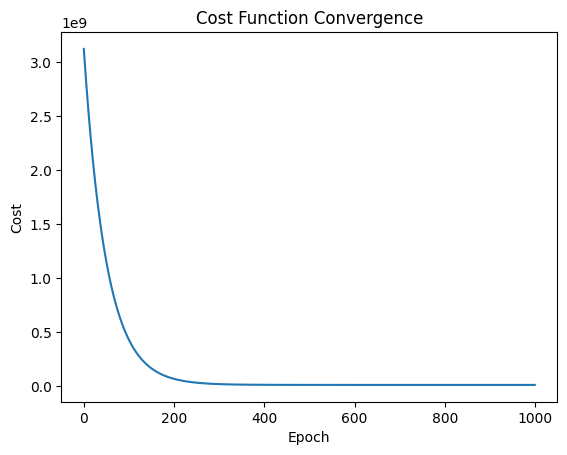

In [13]:
plt.plot(range(epochs), cost_history)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.show()

In [14]:
y_pred = m * X_scaled + b
ss_total = np.sum((y - np.mean(y)) ** 2)
ss_residual = np.sum((y - y_pred) ** 2)
r2 = 1 - (ss_residual / ss_total)
print(f"R² Score: {r2:.4f}")

R² Score: 0.9559


In [15]:
m_original_scale = m / X_std
b_original_scale = b - (m * X_mean) / X_std

print(f"Slope (m): {m_original_scale:.2f}")
print(f"Intercept (b): {b_original_scale:.2f}")

Slope (m): 9523.24
Intercept (b): 25671.91


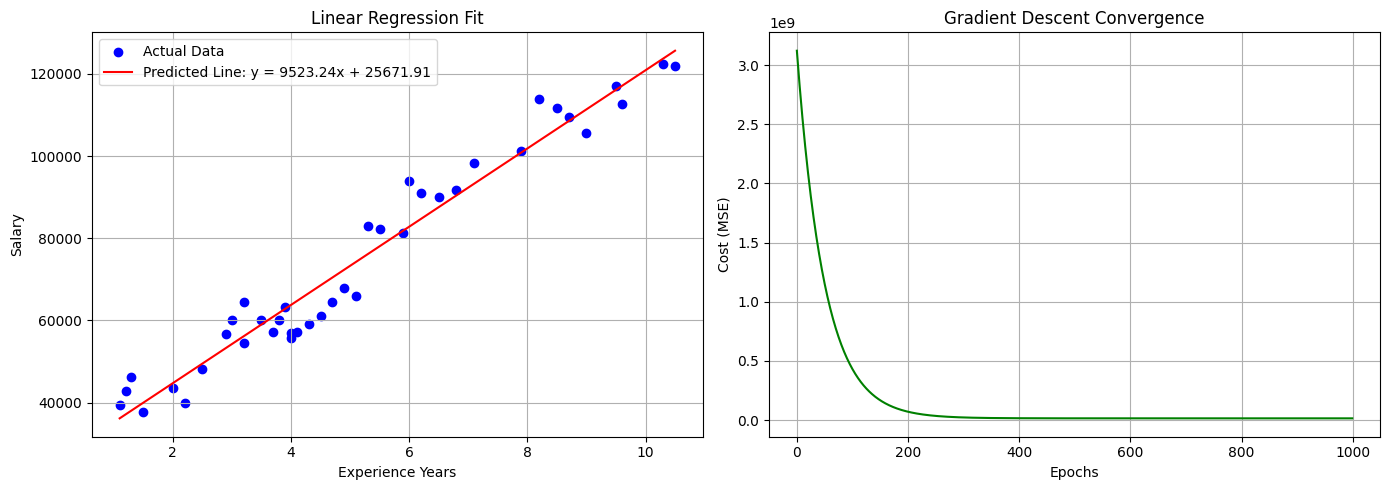

In [21]:
# Create figure with 2 subplots
plt.figure(figsize=(14, 5))

# 1. Regression Line Plot
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, m_original_scale * X + b_original_scale, color='red',
         label=f'Predicted Line: y = {m_original_scale:.2f}x + {b_original_scale:.2f}')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.title('Linear Regression Fit')
plt.grid()
plt.legend()

# 2. Cost Convergence Plot
plt.subplot(1, 2, 2)
plt.plot(range(epochs), cost_history, color='green')
plt.xlabel('Epochs')
plt.grid()
plt.ylabel('Cost (MSE)')
plt.title('Gradient Descent Convergence')
plt.tight_layout()
plt.show()

In [18]:
def predict_salary(experience_years):
    scaled_exp = (experience_years - X_mean) / X_std
    return m * scaled_exp + b

# Example prediction for 5 years of experience
prediction = predict_salary(6)
print(f"Predicted Salary: Rs{prediction:.2f}")

Predicted Salary: Rs82811.34
